In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv(r"D:\ML projects\Student_Performance\StudentPerformanceFactors.csv")
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
data.shape

(6607, 20)

In [5]:
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [7]:
data.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [8]:
null_col = ['Teacher_Quality' , 'Parental_Education_Level', 'Distance_from_Home']
for col in null_col:
    data[col] = data[col].fillna(data[col].mode()[0])

data.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [9]:
x = data.drop('Exam_Score', axis=1)
x.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female


In [10]:
y = data['Exam_Score']
y.head()

0    67
1    61
2    74
3    71
4    70
Name: Exam_Score, dtype: int64

In [11]:
numeric_col = x.select_dtypes(include=['float64', 'int64'])
numeric_col.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity
0,23,84,7,73,0,3
1,19,64,8,59,2,4
2,24,98,7,91,2,4
3,29,89,8,98,1,4
4,19,92,6,65,3,4


In [12]:
outlier_counts = {}

for col in numeric_col:
    Q1 = x[col].quantile(0.25)
    Q3 = x[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_counts[col] = data[(data[col] < lower_bound) | (data[col] > upper_bound)].shape[0]

print(outlier_counts)

{'Hours_Studied': 43, 'Attendance': 0, 'Sleep_Hours': 0, 'Previous_Scores': 0, 'Tutoring_Sessions': 430, 'Physical_Activity': 0}


In [13]:
data['Hours_Studied'].value_counts()

Hours_Studied
20    465
19    441
21    431
23    411
22    402
18    401
17    381
24    357
16    351
15    315
25    289
14    269
26    263
27    229
13    218
12    192
28    171
11    146
29    134
30    123
10     94
9      86
31     77
8      58
32     54
7      51
33     40
34     29
5      21
35     20
4      17
6      17
3      12
36     11
38      7
39      7
2       6
37      6
1       3
43      1
44      1
Name: count, dtype: int64

<Axes: xlabel='Physical_Activity', ylabel='Count'>

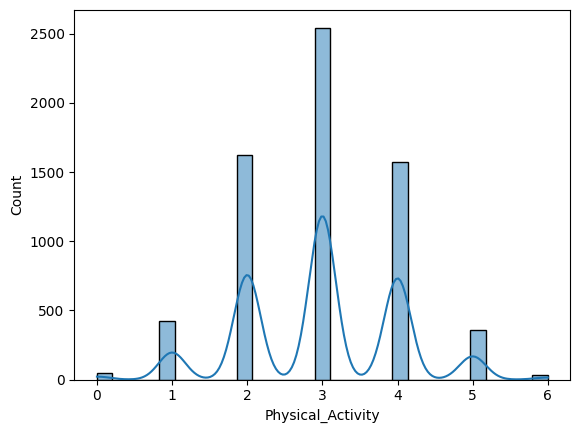

In [14]:
sns.histplot(x['Physical_Activity'], kde = True)

In [15]:
x['Physical_Activity'].value_counts()

Physical_Activity
3    2545
2    1627
4    1575
1     421
5     361
0      46
6      32
Name: count, dtype: int64

In [16]:
numeric_col

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity
0,23,84,7,73,0,3
1,19,64,8,59,2,4
2,24,98,7,91,2,4
3,29,89,8,98,1,4
4,19,92,6,65,3,4
...,...,...,...,...,...,...
6602,25,69,7,76,1,2
6603,23,76,8,81,3,2
6604,20,90,6,65,3,2
6605,10,86,6,91,2,3


<Axes: xlabel='Hours_Studied', ylabel='Count'>

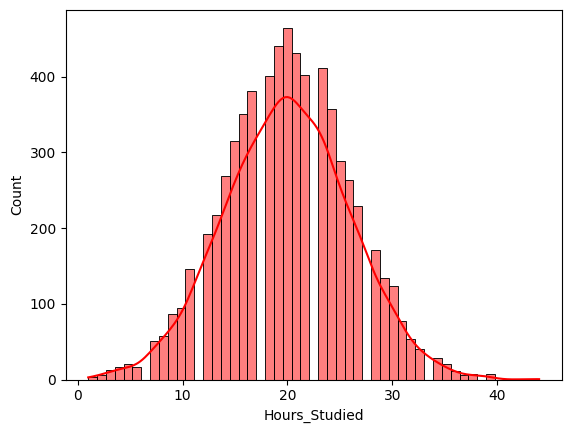

In [17]:
sns.histplot(x['Hours_Studied'], kde = True, color='red')

<Axes: xlabel='Attendance', ylabel='Count'>

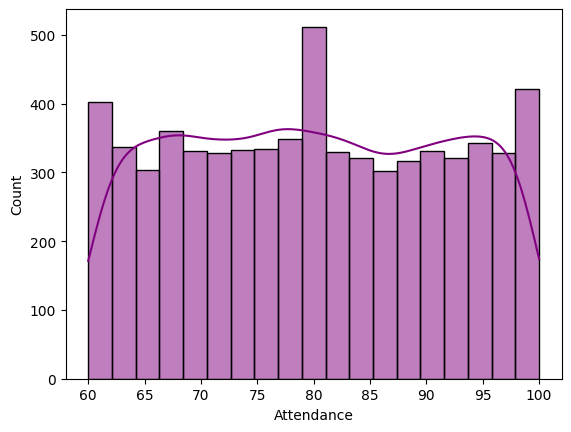

In [18]:
sns.histplot(x['Attendance'], kde = True, color='purple')

<Axes: xlabel='Sleep_Hours', ylabel='Count'>

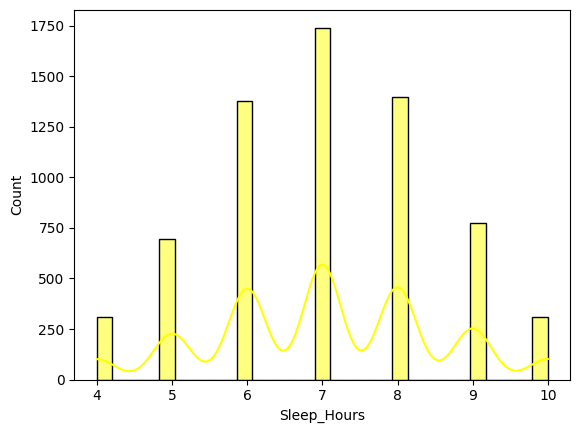

In [19]:
sns.histplot(x['Sleep_Hours'], kde = True, color='yellow')

<Axes: xlabel='Previous_Scores', ylabel='Count'>

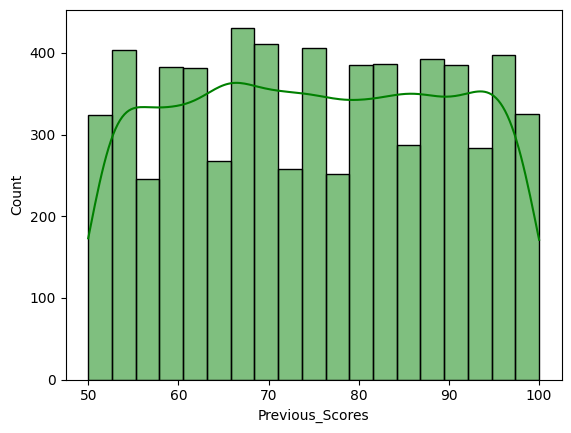

In [20]:
sns.histplot(x['Previous_Scores'], kde = True, color='green')

<Axes: xlabel='Tutoring_Sessions', ylabel='Count'>

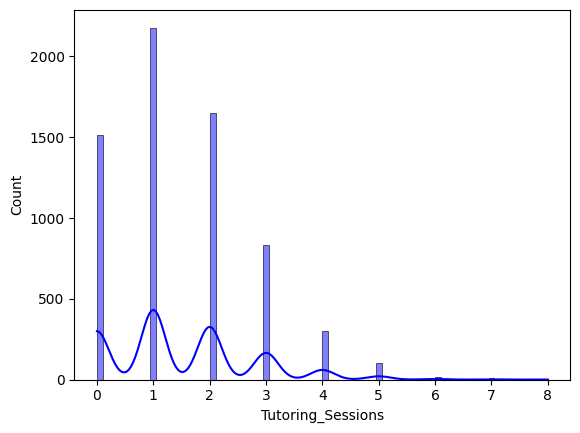

In [21]:
sns.histplot(x['Tutoring_Sessions'], kde = True, color='blue')

<Axes: xlabel='Physical_Activity', ylabel='Count'>

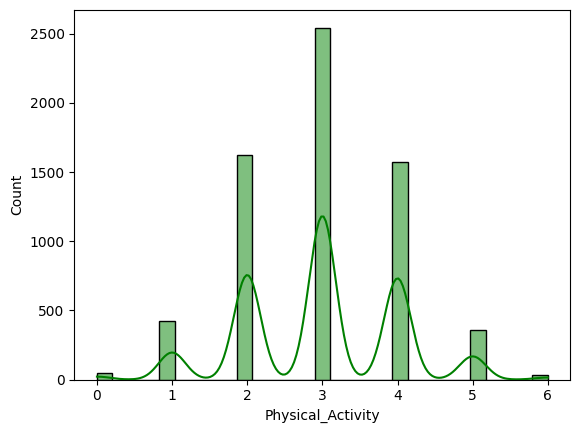

In [22]:
sns.histplot(x['Physical_Activity'], kde = True, color='green')

<Axes: xlabel='Exam_Score', ylabel='Count'>

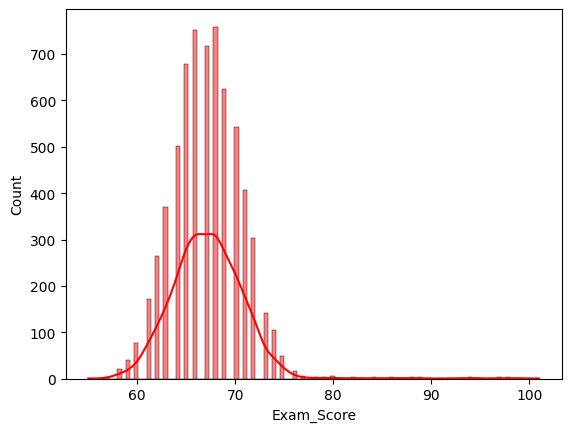

In [23]:
sns.histplot(data['Exam_Score'], kde = True, color='red')

In [24]:
data['Exam_Score'].value_counts()

Exam_Score
68     759
66     751
67     717
65     679
69     624
70     542
64     501
71     408
63     371
72     304
62     264
61     171
73     141
74     106
60      77
75      48
59      40
58      22
76      16
80       5
77       5
94       4
86       4
82       4
78       4
57       4
84       3
79       3
89       3
98       3
88       3
97       3
95       2
93       2
87       2
99       2
92       2
83       1
100      1
55       1
101      1
91       1
96       1
85       1
56       1
Name: count, dtype: int64

<Axes: ylabel='Tutoring_Sessions'>

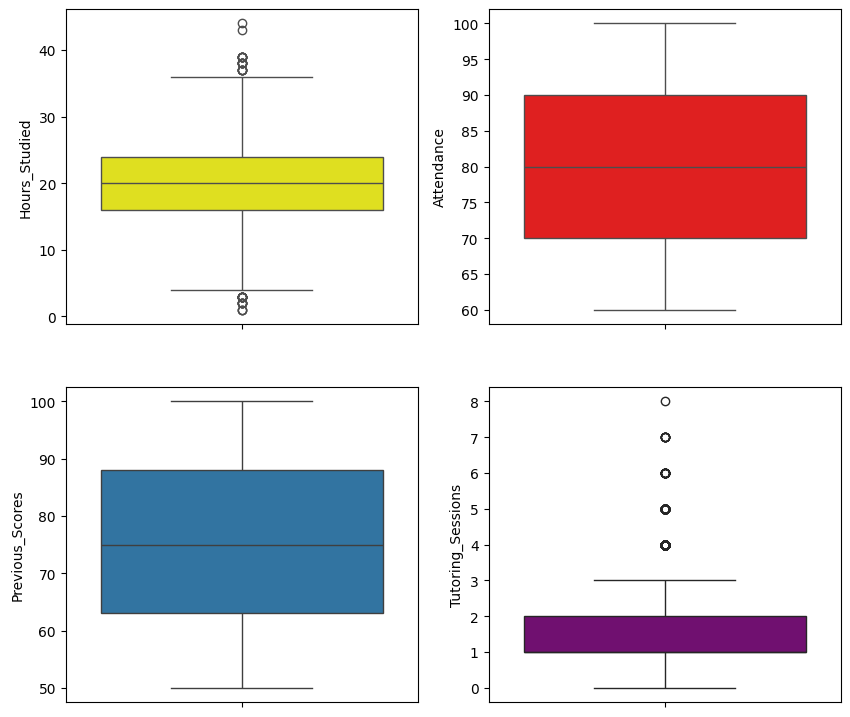

In [25]:
plt.figure(figsize=(10,9))
plt.subplot(2,2,1)
sns.boxplot(y=data['Hours_Studied'], color='Yellow')


plt.subplot(2,2,2)
sns.boxplot(y=data['Attendance'], color='Red')


plt.subplot(2,2,3)
sns.boxplot(y=data['Previous_Scores'])

plt.subplot(2,2,4)
sns.boxplot(y=data['Tutoring_Sessions'], color='purple')

In [26]:
x.select_dtypes(include=['object'])

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
0,Low,High,No,Low,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
1,Low,Medium,No,Low,Yes,Medium,Medium,Public,Negative,No,College,Moderate,Female
2,Medium,Medium,Yes,Medium,Yes,Medium,Medium,Public,Neutral,No,Postgraduate,Near,Male
3,Low,Medium,Yes,Medium,Yes,Medium,Medium,Public,Negative,No,High School,Moderate,Male
4,Medium,Medium,Yes,Medium,Yes,Medium,High,Public,Neutral,No,College,Near,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,High,Medium,No,Medium,Yes,High,Medium,Public,Positive,No,High School,Near,Female
6603,High,Medium,No,Medium,Yes,Low,High,Public,Positive,No,High School,Near,Female
6604,Medium,Low,Yes,Low,Yes,Low,Medium,Public,Negative,No,Postgraduate,Near,Female
6605,High,High,Yes,High,Yes,Low,Medium,Private,Positive,No,High School,Far,Female


<Axes: xlabel='Parental_Involvement', ylabel='Exam_Score'>

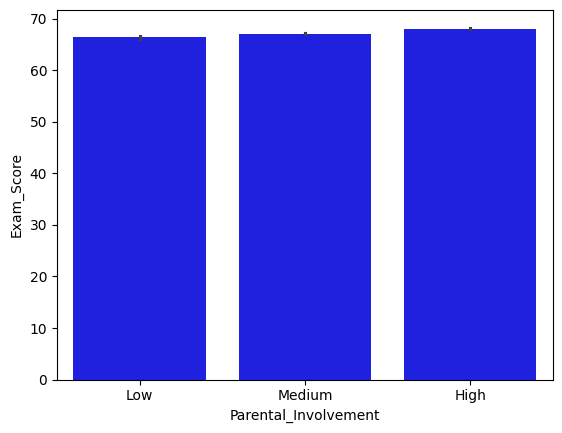

In [27]:
plt.Figure(figsize=(10,20))

sns.barplot(x='Parental_Involvement', y='Exam_Score', data=data, color = 'blue')

<Axes: xlabel='Access_to_Resources', ylabel='Exam_Score'>

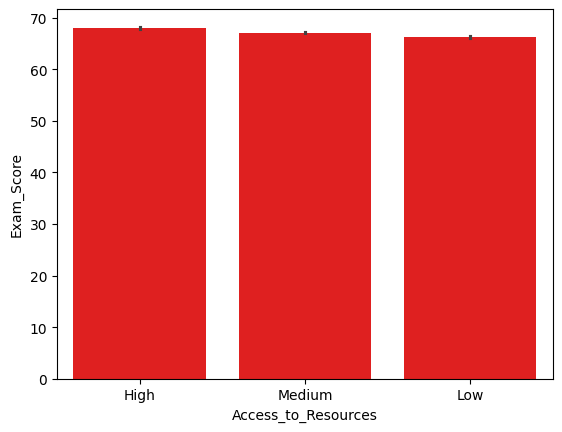

In [28]:
sns.barplot(x='Access_to_Resources', y='Exam_Score', data=data, color = 'red')

<Axes: >

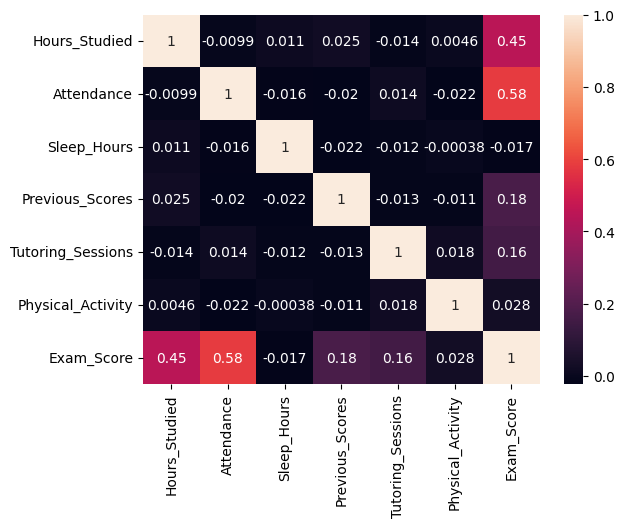

In [29]:
sns.heatmap(data.corr(numeric_only=True), annot=True)

In [30]:
x_encode = pd.get_dummies(x)
x_encode = x_encode.astype(int)
x_encode.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Parental_Involvement_High,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_High,...,Learning_Disabilities_No,Learning_Disabilities_Yes,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Far,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Female,Gender_Male
0,23,84,7,73,0,3,0,1,0,1,...,1,0,0,1,0,0,0,1,0,1
1,19,64,8,59,2,4,0,1,0,0,...,1,0,1,0,0,0,1,0,1,0
2,24,98,7,91,2,4,0,0,1,0,...,1,0,0,0,1,0,0,1,0,1
3,29,89,8,98,1,4,0,1,0,0,...,1,0,0,1,0,0,1,0,0,1
4,19,92,6,65,3,4,0,0,1,0,...,1,0,1,0,0,0,0,1,1,0


In [31]:
num_col = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']
scale = StandardScaler()
x_encode[num_col] = scale.fit_transform(x_encode[num_col])
x_encode.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Parental_Involvement_High,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_High,...,Learning_Disabilities_No,Learning_Disabilities_Yes,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Far,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Female,Gender_Male
0,0.504942,0.348375,-0.019796,-0.143800,-1.213934,0.031411,0,1,0,1,...,1,0,0,1,0,0,0,1,0,1
1,-0.162822,-1.383736,0.661399,-1.116110,0.411451,1.001199,0,1,0,0,...,1,0,1,0,0,0,1,0,1,0
2,0.671882,1.560853,-0.019796,1.106313,0.411451,1.001199,0,0,1,0,...,1,0,0,0,1,0,0,1,0,1
3,1.506587,0.781403,0.661399,1.592469,-0.401242,1.001199,0,1,0,0,...,1,0,0,1,0,0,1,0,0,1
4,-0.162822,1.041220,-0.700990,-0.699406,1.224144,1.001199,0,0,1,0,...,1,0,1,0,0,0,0,1,1,0


In [32]:
x_train,x_test,y_train,y_test = train_test_split(x_encode,y,test_size=0.15,random_state=42)

In [33]:
linear_reg = LinearRegression()
model = linear_reg.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [34]:
acc = r2_score (y_test,y_pred)
print(f"{acc}")


0.7970007903200631


In [35]:
from sklearn.model_selection import cross_val_score

cross_score = cross_val_score(model, x_encode, y, cv=12, scoring="r2")
print(f"Cross Validation R² Score: {cross_score.mean()}")

Cross Validation R² Score: 0.7335619949763288


In [44]:
scalar = StandardScaler()
x_train_scalar = scalar.fit_transform(x_train)
x_test_scalar = scalar.fit_transform(x_test)

In [45]:
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p)
y_train_trans = transformer.fit_transform(y_train)
y_test_trans = transformer.transform(y_test)
     

In [46]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)
     

In [47]:
linear_model = LinearRegression()
model_lr = linear_model.fit(X_train_scaled, y_train_trans)
y_pred_lr = model_lr.predict(X_test_scaled)

In [48]:
r2 = r2_score(y_test_trans, y_pred_lr)
msr = mean_squared_error(y_test_trans, y_pred_lr)
mar = mean_absolute_error(y_test_trans, y_pred_lr)
print("Linear R² Score:", r2)
print("Mean Squared Error:" , msr)
print("Mean Absolute Error:", mar)


Linear R² Score: 0.8408907065556128
Mean Squared Error: 0.0004660040815488881
Mean Absolute Error: 0.006296218624560231


In [49]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2, interaction_only=True)
X_train_pf = pf.fit_transform(X_train_scaled)
X_test_pf = pf.transform(X_test_scaled)

In [50]:
linear_model_pf = LinearRegression()
model_lr_pf = linear_model.fit(X_train_pf, y_train_trans)
y_pred_lr_pf = model_lr.predict(X_test_pf)
r2 = r2_score(y_test_trans, y_pred_lr_pf)
msr = mean_squared_error(y_test_trans, y_pred_lr_pf)
mar = mean_absolute_error(y_test_trans, y_pred_lr_pf)
print("Linear R² Score:", r2)
print("Mean Squared Error:" , msr)
print("Mean Absolute Error:", mar)


Linear R² Score: 0.8281187445229049
Mean Squared Error: 0.000503410987882173
Mean Absolute Error: 0.008175799751037117


In [51]:
accuracy_lr = r2_score(y_test_trans, y_pred_lr)
accuracy_lr_pf = r2_score(y_test_trans, y_pred_lr_pf)

if accuracy_lr > accuracy_lr_pf:
  print(f"Linear Regression performed well!")
elif accuracy_lr < accuracy_lr_pf:
  print(f"Linear Regression with Polynomial feature performed well!")
else:
  print(f"Both models performed same!")

Linear Regression performed well!
